In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

In [3]:
import pandas as pd
df = pd.read_csv("twitter_data.csv")
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [4]:
df['labels'] = df['class'].map({0:"Hate Speech Detected", 1:"Offensive language detected", 3:"No hate and offensive Speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                        labels  
0                          NaN  
1  Offensive language detected  
2  Offensive language detected  
3  Offensive language detected  
4  Offensive language detected  


In [5]:
df = df[['tweet', 'labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,NaN
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language detected


In [6]:
def clean(text):
    text= str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    tetxt = re.sub('https?://\S+|www\.\S+', '', text)
    tetxt = re.sub('<.*?>+','|',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '' ,text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word in text.split(' ')]
    text=" ".join(text)
    text =[stemmer.stem(word) for word in text.split(' ')] 
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolov as a woman you shouldnt complain...   
1   rt  boy dat coldtyga dwn bad for cuffin dat h...   
2   rt urkindofbrand dawg rt  you ever fuck a bit...   
3       rt cganderson vivabas she look like a tranni   
4   rt shenikarobert the shit you hear about me m...   

                        labels  
0                          NaN  
1  Offensive language detected  
2  Offensive language detected  
3  Offensive language detected  
4  Offensive language detected  


In [7]:
import numpy as np
print(df.isnull().sum())

# Drop rows with NaN values
df = df.dropna()

# Verify that NaN values are removed
print(df.isnull().sum())

x = np.array(df["tweet"])
y = np.array(df["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

tweet        0
labels    4163
dtype: int64
tweet     0
labels    0
dtype: int64


DecisionTreeClassifier()

In [8]:
test_data = "I will kill you"
test_data_transformed = cv.transform([test_data])  # Transform the test data
print(clf.predict(test_data_transformed))  # Make prediction

['Hate Speech Detected']


In [9]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier
dt_clf = DecisionTreeClassifier()

# Train the decision tree classifier
dt_clf.fit(X_train, y_train)

# Now you can use dt_clf to make predictions and calculate accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the labels for the test set
y_pred = dt_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9103600293901543
Precision: 0.9130372413373794
Recall: 0.9103600293901543
F1-score: 0.9116746273352225
Confusion Matrix:
[[ 139  291]
 [ 319 6056]]


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [4]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

In [5]:
# Load your dataset
df = pd.read_csv('twitter_data.csv')
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [6]:
# Map class values to labels
df['labels'] = df['class'].map({0: "Hate Speech Detected", 1: "Offensive language detected", 3: "No hate and offensive Speech"})
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                        labels  
0                          NaN  
1  Offensive language detected  
2  Offensive language detected  
3  Offensive language detected  
4  Offensive language detected  


In [8]:
df = df[['tweet', 'labels']]
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,NaN
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language detected


In [9]:
import string
def clean(text):
    text= str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    tetxt = re.sub('https?://\S+|www\.\S+', '', text)
    tetxt = re.sub('<.*?>+','|',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '' ,text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word in text.split(' ')]
    text=" ".join(text)
    text =[stemmer.stem(word) for word in text.split(' ')] 
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)
print(df.head())

                                               tweet  \
0   rt mayasolov as a woman you shouldnt complain...   
1   rt  boy dat coldtyga dwn bad for cuffin dat h...   
2   rt urkindofbrand dawg rt  you ever fuck a bit...   
3       rt cganderson vivabas she look like a tranni   
4   rt shenikarobert the shit you hear about me m...   

                        labels  
0                          NaN  
1  Offensive language detected  
2  Offensive language detected  
3  Offensive language detected  
4  Offensive language detected  


In [10]:
import numpy as np
print(df.isnull().sum())

# Drop rows with NaN values
df = df.dropna()

# Verify that NaN values are removed
print(df.isnull().sum())

x = np.array(df["tweet"])
y = np.array(df["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

tweet        0
labels    4163
dtype: int64
tweet     0
labels    0
dtype: int64


RandomForestClassifier()

In [11]:
test_data = "I will kill you"
test_data_transformed = cv.transform([test_data])  # Transform the test data
print(clf.predict(test_data_transformed))  # Make prediction

['Offensive language detected']


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier
rf_clf = RandomForestClassifier()

# Train the random forest classifier
rf_clf.fit(X_train, y_train)

# Now you can use rf_clf to make predictions and calculate accuracy

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the labels for the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9353416605437178
Precision: 0.91562280279983
Recall: 0.9353416605437178
F1-score: 0.9204291925425139
Confusion Matrix:
[[  70  360]
 [  80 6295]]


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define and train the decision tree classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Define and train the random forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
# Predict the labels for the test set using the decision tree classifier
dt_y_pred = dt_clf.predict(X_test)

# Calculate accuracy for the decision tree classifier
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)

# Predict the labels for the test set using the random forest classifier
rf_y_pred = rf_clf.predict(X_test)

# Calculate accuracy for the random forest classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Decision Tree Accuracy: 0.9108008817046289
Random Forest Accuracy: 0.9371050698016165


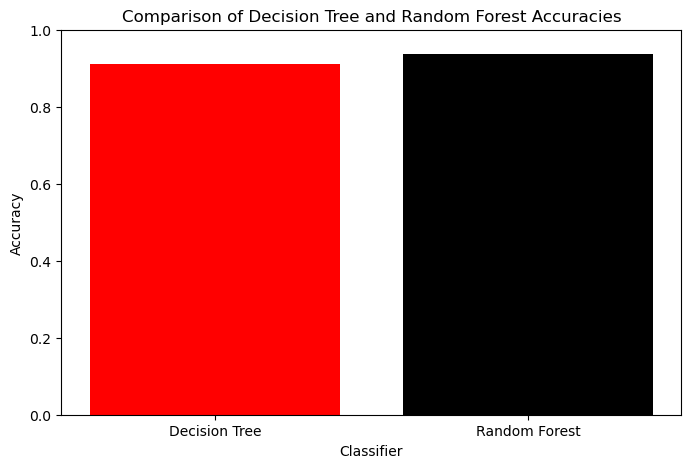

In [19]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Decision Tree', 'Random Forest']

# List of accuracies
accuracies = [dt_accuracy, rf_accuracy]

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracies, color=['red', 'black'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Decision Tree and Random Forest Accuracies')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy range
plt.show()